In [ ]:
# Importing all the rquired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Flight Fare Dataset'):
    for filename in filenames:
      print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Flight Fare Dataset/Clean_Dataset.csv
/content/drive/MyDrive/Colab Notebooks/Flight Fare Dataset/business.csv
/content/drive/MyDrive/Colab Notebooks/Flight Fare Dataset/economy.csv


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flight Fare Dataset/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [ ]:
df.shape

(300153, 11)

In [ ]:
df1=df.groupby(['flight', 'airline'], as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


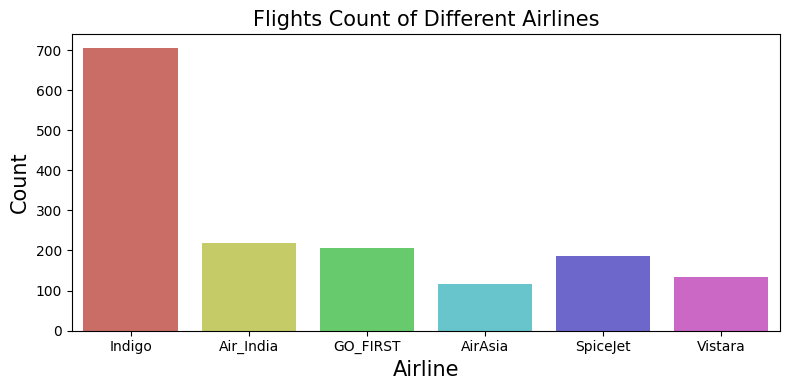

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='airline', data=df1, palette='hls')
plt.title('Flights Count of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df2=df.groupby(['flight', 'airline', 'class'], as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


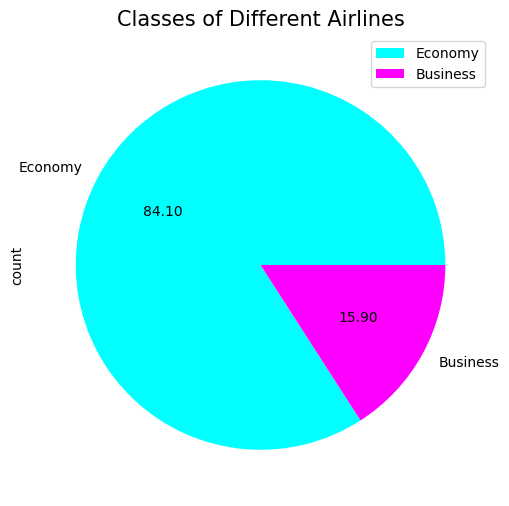

In [ ]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie', textprops={'color':'black'},autopct='%.2f', cmap='cool')
plt.title('Classes of Different Airlines', fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

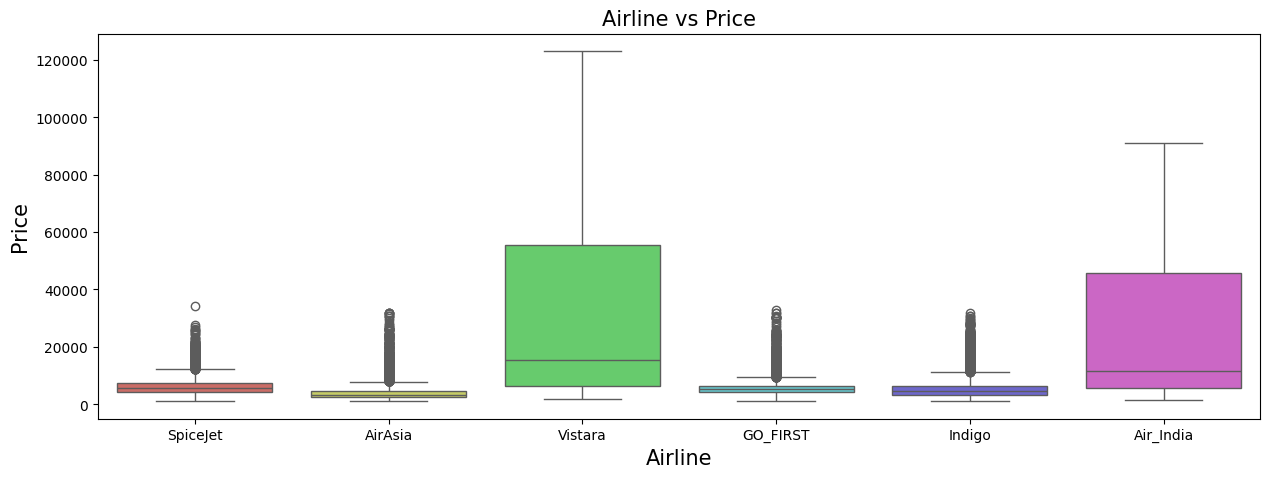

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airline vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

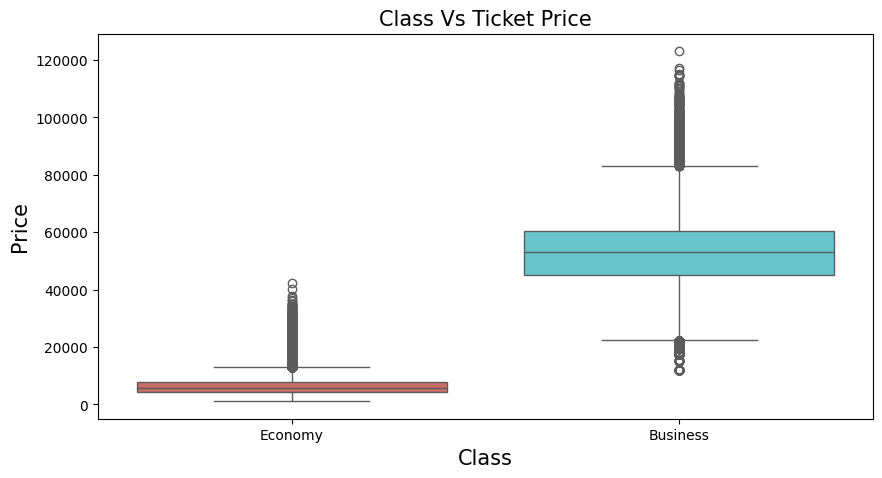

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

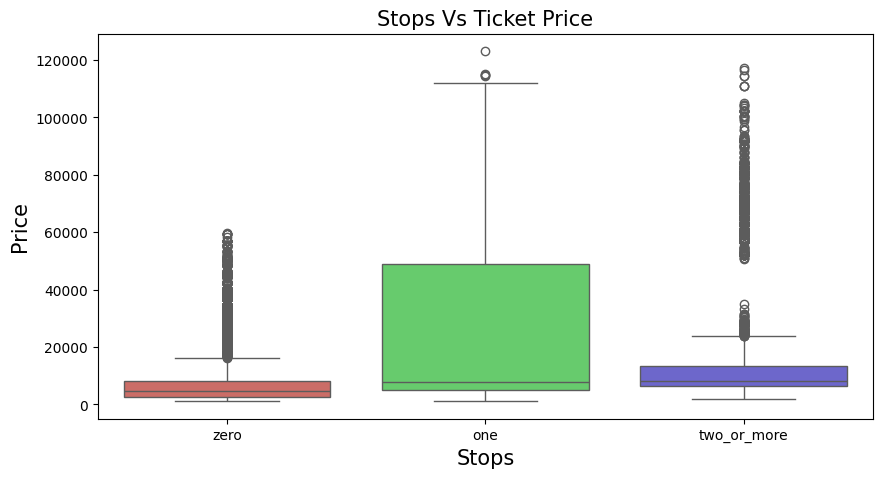

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

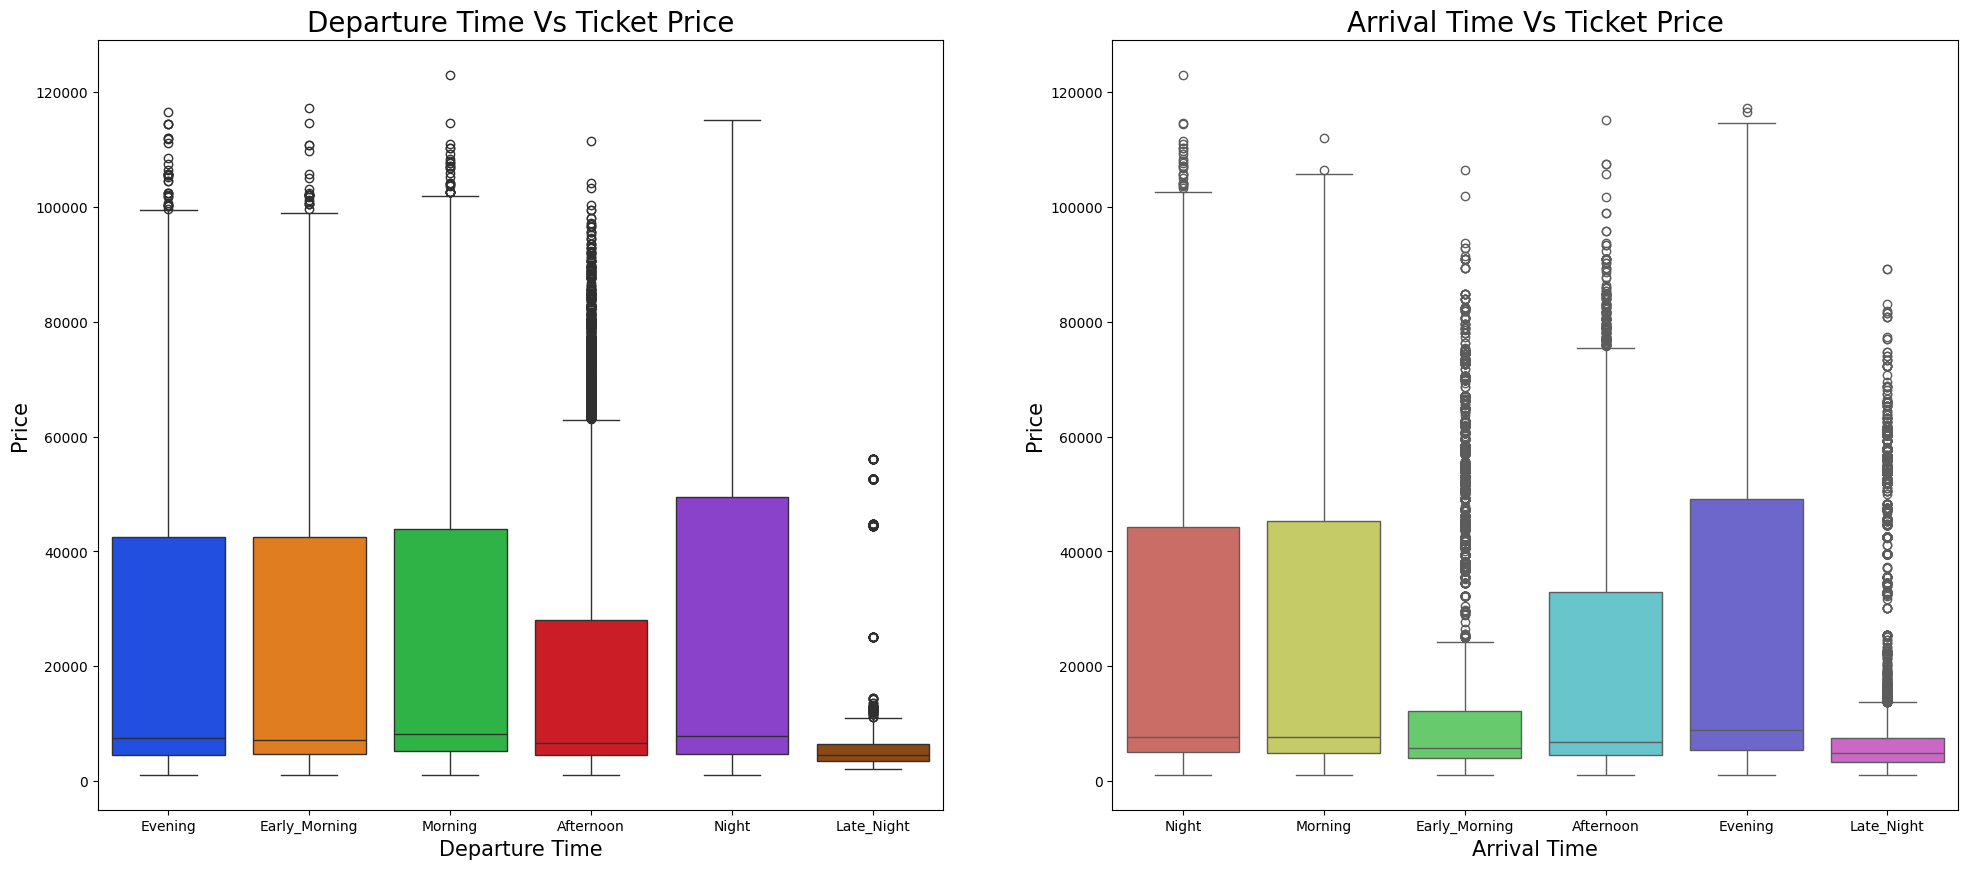

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df, palette='bright')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

1. Departure Time vs Ticket Price


*   Ticket price is more expensive for the flight when the departure time is at night
*   Ticket price is almost equal for flights having departure time at morning, early morning and evening
*  Ticket price is low when the flights departure at late night

2.   Arrival Time vs Ticket Price

*   Ticket price is more for the flights when the arrival time is at evening
*   Ticket price is almost equal for flights having arrival time at morning and night
*   Ticket price is low for the flights having arrival time at late night as same as departure time








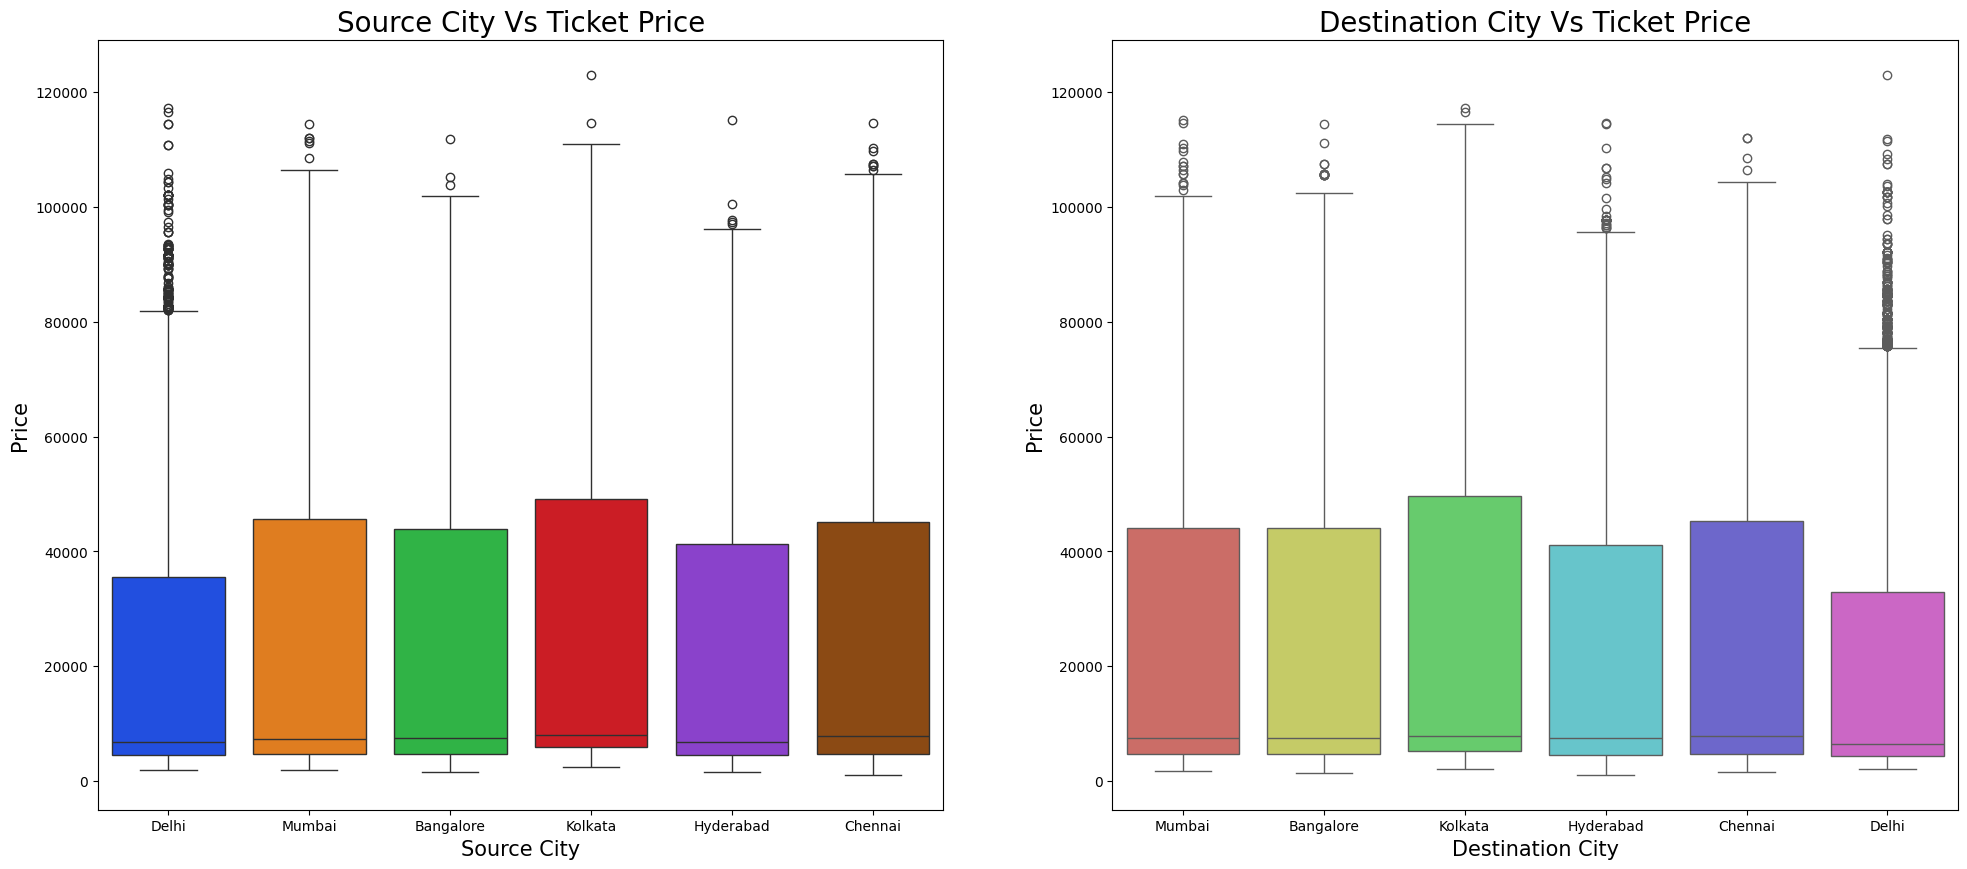

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df, palette='bright')
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

1.   Source City Vs Ticket Price


*   Ticket price is more for the flights whose source city is Koikata
*   Ticket price is almost equal for flights having source cities as Mumbai and Chennai, Hyderabad and Bangalore
*   Ticket price is low for the flights having source city as Delhi

2.  Destination City vs Ticket Price

*   Ticket price is more for the flight whose destination city is kolkata and Chennai
*  Ticket price is almost equal for flights having destination cities as Mumbai and Bangalore
*   Ticket price is low for the flight having destination city as Delhi










AttributeError: 'Text' object has no property 'fotnsize'

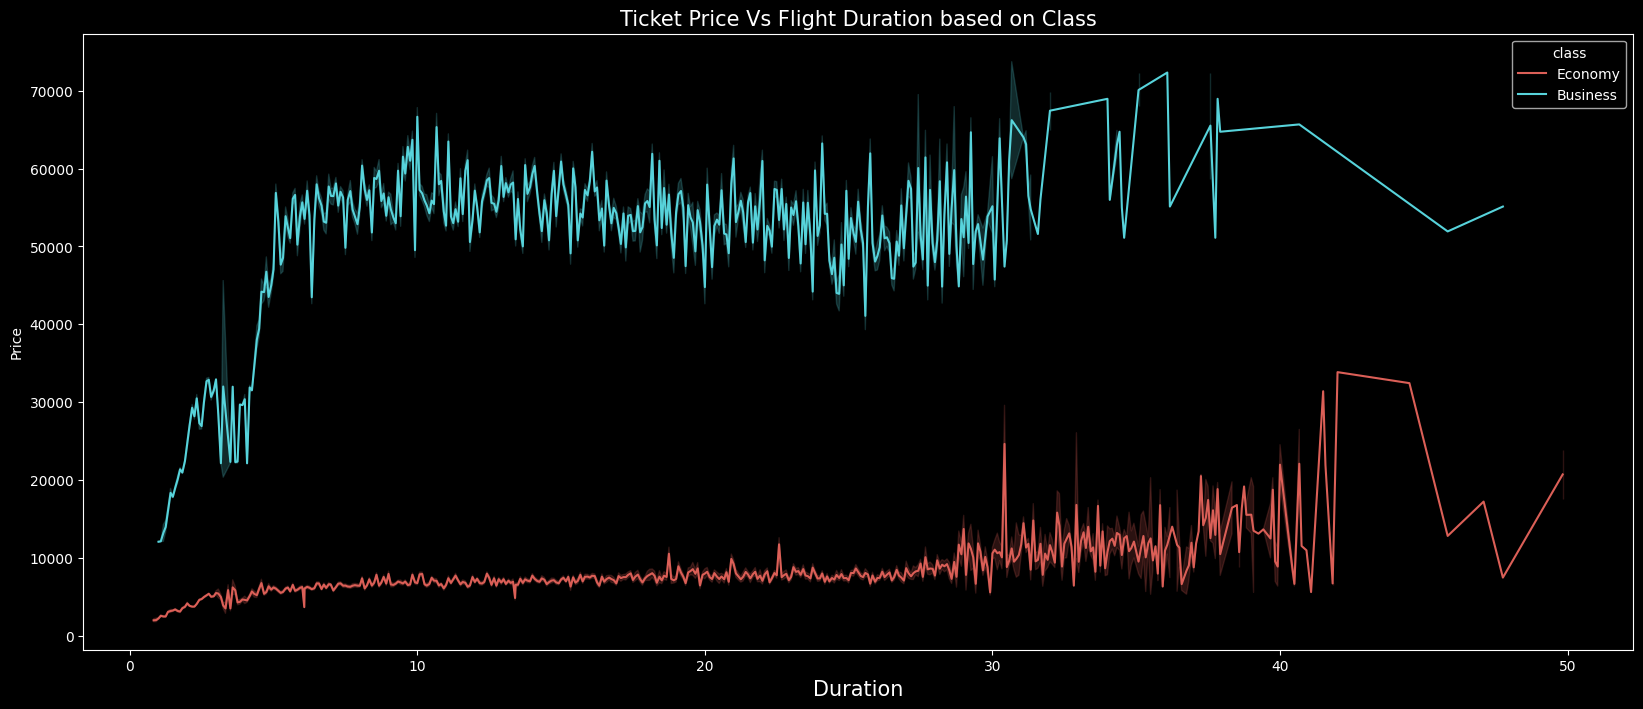

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='duration', y='price', hue='class', palette='hls')
plt.title('Ticket Price Vs Flight Duration based on Class', fontsize=15)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Price', fotnsize=15)
plt.show()

Text(0, 0.5, 'Price')

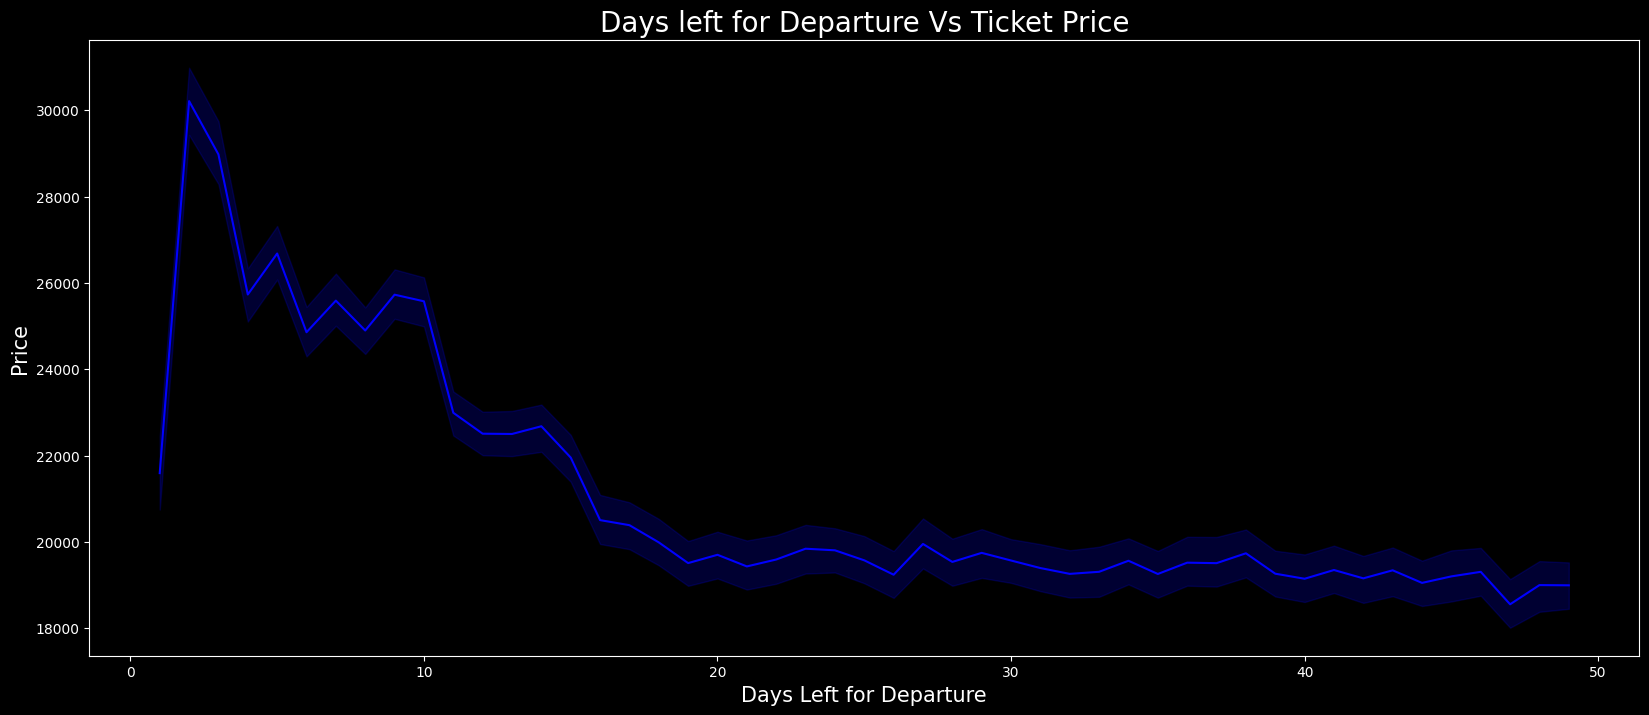

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title('Days left for Departure Vs Ticket Price', fontsize=20)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)

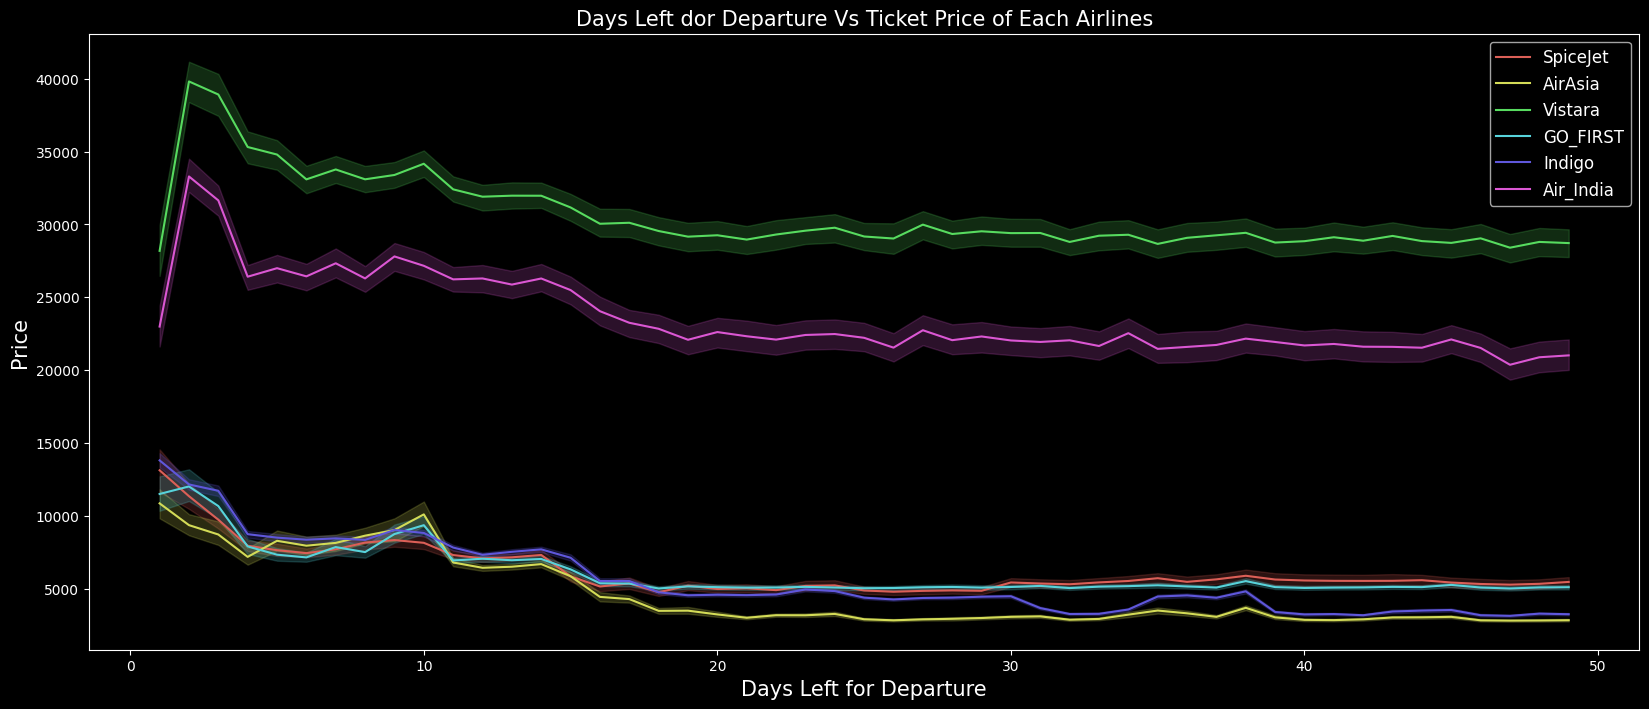

In [ ]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='days_left', y='price', color='blue', hue='airline', palette='hls')
plt.title('Days Left dor Departure Vs Ticket Price of Each Airlines', fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [ ]:
df.groupby(['flight', 'source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [ ]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [ ]:
df_bk=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
      if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col ])

In [ ]:
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((210107, 11), (90046, 11), (210107,), (90046,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler (feature_range=(0,1))
x_train = mmscaler.fit_transform(x_train)
x_test = mmscaler.fit_transform(x_test)
x_train =pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.541
Mean Squared Error (MSE): 49057844.123
Root Mean Squared Error (RMSE): 7004.131
R2_score: 0.90468
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904677
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1126.012
Mean Squared Error (MSE): 12214881.084
Root Mean Squared Error (RMSE): 3494.979
R2_score: 0.976266
Root Mean Squared Log Error (RMSLE): 8.159
Mean Absolute Percentage Error (MAPE): 7.52 %
Adj R Square:  0.976265
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1063.242
Mean Squared Error (MSE): 7381756.422
Root Mean Squared Error (RMSE): 2716.939
R2_score: 0.985657
Root Mean Squared Log Error (RMSLE): 7.907
Mea

In [11]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.541170,0.904677,7004.130504,43.893081,4.905784e+07,8.854255,0.904680
1,DecisionTreeRegressor(),1126.011716,0.976265,3494.979411,7.518996,1.221488e+07,8.159083,0.976266
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1063.242301,0.985656,2716.938796,7.004655,7.381756e+06,7.907261,0.985657
3,KNeighborsRegressor(),1859.249268,0.971603,3822.893041,11.204608,1.461451e+07,8.248763,0.971604
4,"(ExtraTreeRegressor(random_state=1370417687), ...",1010.788845,0.987250,2561.660211,6.618424,6.562103e+06,7.848411,0.987250
5,([DecisionTreeRegressor(criterion='friedman_ms...,2716.607524,0.959393,4571.477084,20.481603,2.089840e+07,8.427592,0.959394
6,"XGBRegressor(base_score=None, booster=None, ca...",1763.788696,0.979005,3287.105566,13.610679,1.080506e+07,8.097763,0.979006
7,(DecisionTreeRegressor(random_state=1309659360...,1112.877777,0.984176,2853.656625,7.390268,8.143356e+06,7.956356,0.984177
8,Ridge(),4630.567931,0.904677,7004.127419,43.893437,4.905780e+07,8.854255,0.904680
9,Lasso(alpha=0.1),4630.427579,0.904678,7004.121108,43.890110,4.905771e+07,8.854254,0.904681


In [12]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.987250,1010.788845,2561.660211,6.618424,6.562103e+06,7.848411,0.987250
1,RandomForestRegressor,0.985656,1063.242301,2716.938796,7.004655,7.381756e+06,7.907261,0.985657
2,BaggingRegressor,0.984176,1112.877777,2853.656625,7.390268,8.143356e+06,7.956356,0.984177
3,XGBRegressor,0.979005,1763.788696,3287.105566,13.610679,1.080506e+07,8.097763,0.979006
4,DecisionTreeRegressor,0.976265,1126.011716,3494.979411,7.518996,1.221488e+07,8.159083,0.976266
5,KNeighborsRegressor,0.971603,1859.249268,3822.893041,11.204608,1.461451e+07,8.248763,0.971604
6,GradientBoostingRegressor,0.959393,2716.607524,4571.477084,20.481603,2.089840e+07,8.427592,0.959394
7,Lasso Regression,0.904678,4630.427579,7004.121108,43.890110,4.905771e+07,8.854254,0.904681
8,LinearRegression,0.904677,4630.541170,7004.130504,43.893081,4.905784e+07,8.854255,0.904680
9,Ridge Regression,0.904677,4630.567931,7004.127419,43.893437,4.905780e+07,8.854255,0.904680


In [13]:
#Trainig the model with
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [14]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [15]:
result.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
148826,148826,Vistara,UK-708,Kolkata,Night,one,Night,Chennai,Economy,23.83,11,11675,11675,12308.55
262,262,Indigo,6E-218,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,3,5955,5955,6282.22
1626,1626,Air_India,AI-877,Delhi,Morning,one,Evening,Mumbai,Economy,6.42,10,17715,17715,18127.30
98409,98409,GO_FIRST,G8-116,Bangalore,Early_Morning,one,Night,Mumbai,Economy,13.83,26,5177,5177,6132.05
49238,49238,GO_FIRST,G8-351,Mumbai,Morning,one,Afternoon,Delhi,Economy,7.00,32,7900,7900,7725.72
14819,14819,AirAsia,I5-721,Delhi,Night,zero,Night,Bangalore,Economy,2.83,25,4499,4499,4496.93
40207,40207,Vistara,UK-837,Delhi,Evening,zero,Night,Chennai,Economy,2.83,33,2399,2399,2430.05
96702,96702,Air_India,AI-808,Bangalore,Night,one,Night,Mumbai,Economy,24.58,17,6158,6158,6569.83
118595,118595,Air_India,AI-9501,Bangalore,Early_Morning,two_or_more,Early_Morning,Chennai,Economy,24.08,37,6220,6220,6035.69
189867,189867,Air_India,AI-538,Chennai,Night,one,Morning,Mumbai,Economy,12.75,20,4357,4357,4357.06


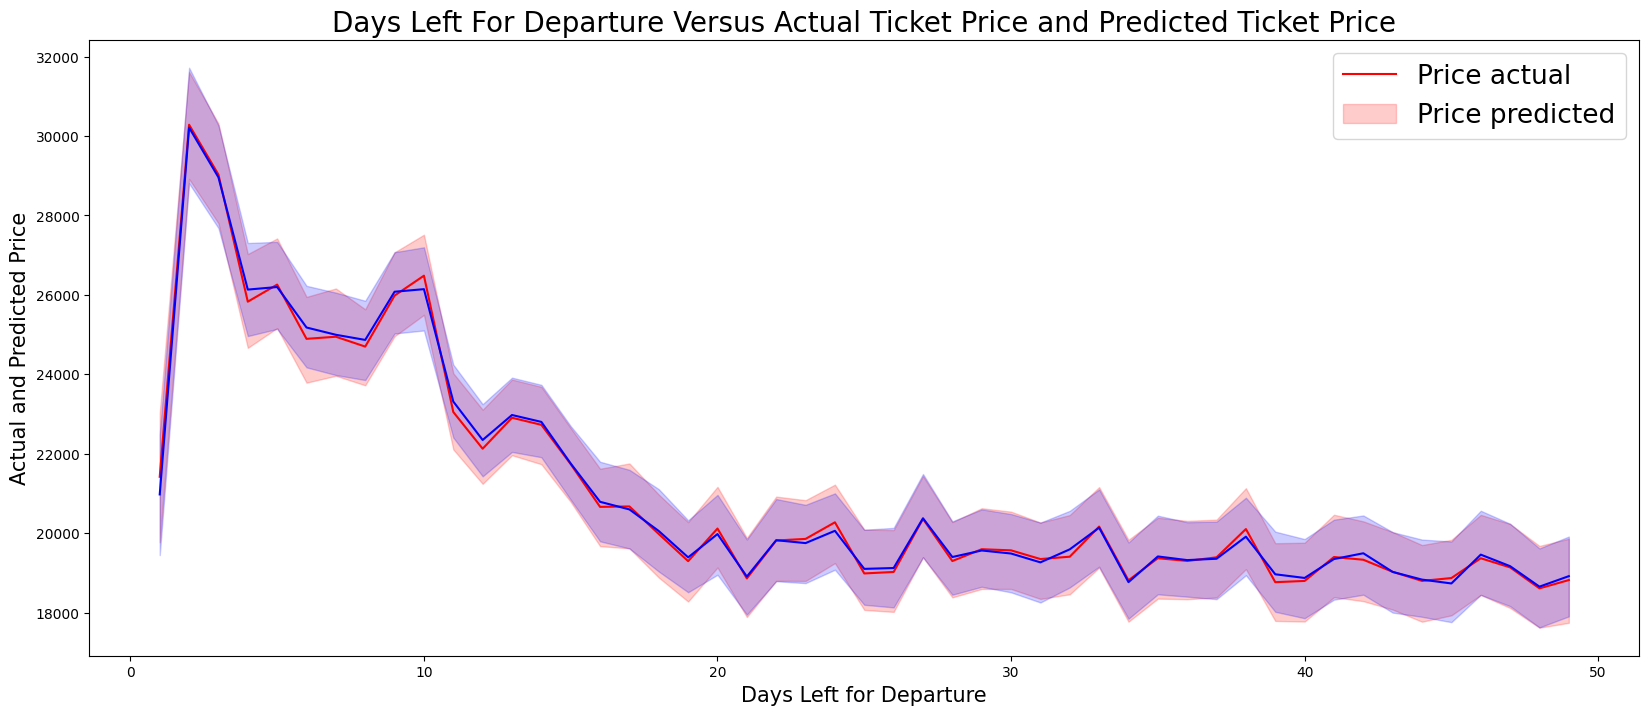

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

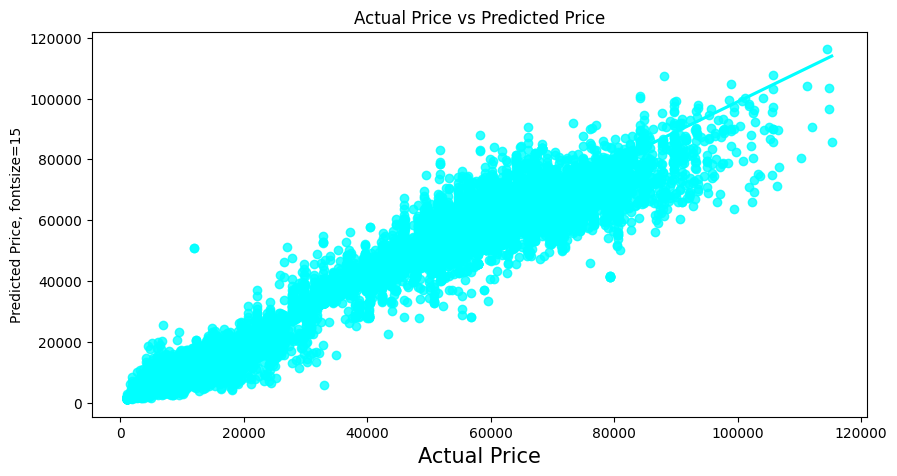

In [17]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual', y='Price_pred', data=result, color='cyan')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price, fontsize=15')
plt.show()